"Машинное обучение для задач ИБ"

Лабораторная работа №2. 

Решили взять классификаторы из первой лабораторной и применить их на новых данных

Макаров Андрей 6231

Богданова Юлия 6331

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder

#Зависимости для cnn
from keras.models import Sequential 
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [2]:
# Подгрузили датасет и вывели краткое описание
def model_train(dataset_path, n_epoch,j):
    dataset = pd.read_csv(dataset_path) 
    dataset = dataset.drop(columns = ['Image Name'])
    n_class = dataset['with message']
    dataset = dataset.drop(columns = ['with message'])
    
    #Данные для cnn; теперь Х и У это нампи массивы
    X = dataset.values 
    Y = n_class.values

    # Нормализация данных 
    sc = StandardScaler() 
    X = sc.fit_transform(X)
   
    Y = np.reshape(Y, (1000, 1)).astype(int)
        
    ohe = OneHotEncoder()
    y = ohe.fit_transform(Y).toarray()

    #разбили данные для нейросети
    X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size = 0.30 , shuffle=True, random_state=0)
    
    # Reserve 10,000 samples for validation
    x_val = X_train_nn[-100:]
    y_val = y_train_nn[-100:]
    X_train_nn = X_train_nn[:-100]
    y_train_nn = y_train_nn[:-100]

    #построили нейросеть
    model = Sequential()
    
    model.add(Dense(42, input_dim=10, activation='sigmoid'))
    model.add(Dense(34, activation='sigmoid'))
    model.add(Dense(20, activation='elu'))
    model.add(Dense(20, activation='elu'))
    model.add(Dense(18, activation='elu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train_nn, y_train_nn, validation_data = (x_val, y_val),batch_size=32, epochs=n_epoch)

    y_pred = model.predict(X_test_nn)

    #Converting predictions to label
    pred = list()
    for i in range(len(y_pred)):
        pred.append(np.argmax(y_pred[i]))
    #Converting one hot encoded test label to label
    test = list()
    for i in range(len(y_test_nn)):
        test.append(np.argmax(y_test_nn[i]))


    #Точность модели и ф-мера
    a = accuracy_score(pred,test)
    print('Accuracy is:', a*100)
    f1_mera_nn = f1_score(pred, test)
    print('f1_score:', f1_mera_nn)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['val_loss']) 
    plt.plot(history.history['loss']) 
    plt.title('Model loss') 
    plt.ylabel('Loss') 
    plt.xlabel('Epoch') 
    plt.legend(['Train', 'Test'], loc='upper left') 
    plt.show()
    model.save('./models/keras_model_'+str(j)+'0.h5')

    return a, f1_mera_nn, dataset_path, history

Epoch 1/50
19/19 [==============================] - 1s 10ms/step - loss: 0.6995 - accuracy: 0.5317 - val_loss: 0.6781 - val_accuracy: 0.6900
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6367 - val_loss: 0.6552 - val_accuracy: 0.7300
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6933 - val_loss: 0.6170 - val_accuracy: 0.7200
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.6950 - val_loss: 0.5861 - val_accuracy: 0.7300
Epoch 5/50
19/19 [==============================] - 0s 3ms/step - loss: 0.6027 - accuracy: 0.6883 - val_loss: 0.5871 - val_accuracy: 0.7200
Epoch 6/50
19/19 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7067 - val_loss: 0.5642 - val_accuracy: 0.7100
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.6917 - val_loss: 0.5573 - val_accuracy: 0.7300
Epoch 8/50
19/19 [=

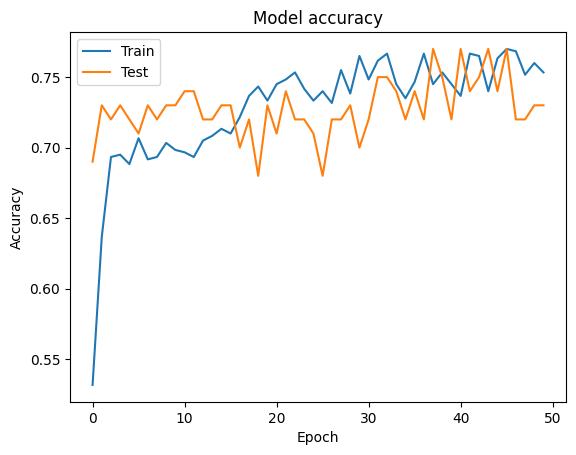

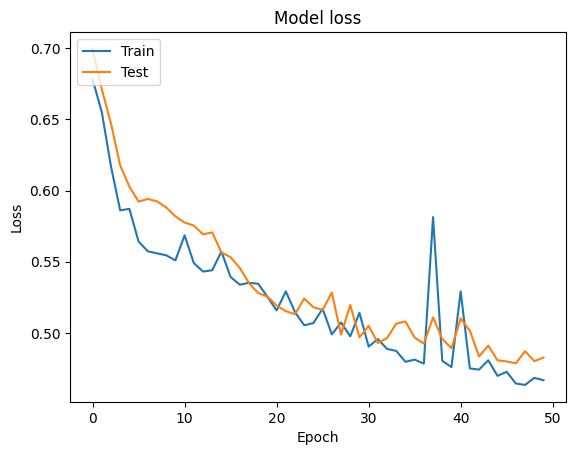

Epoch 1/50
19/19 [==============================] - 1s 9ms/step - loss: 0.6725 - accuracy: 0.5500 - val_loss: 0.6177 - val_accuracy: 0.8000
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.6633 - val_loss: 0.5711 - val_accuracy: 0.5500
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 0.5345 - accuracy: 0.7417 - val_loss: 0.5185 - val_accuracy: 0.6700
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7917 - val_loss: 0.4428 - val_accuracy: 0.8200
Epoch 5/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4258 - accuracy: 0.8250 - val_loss: 0.3997 - val_accuracy: 0.7900
Epoch 6/50
19/19 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8350 - val_loss: 0.3890 - val_accuracy: 0.8000
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8383 - val_loss: 0.3772 - val_accuracy: 0.8500
Epoch 8/50
19/19 [==

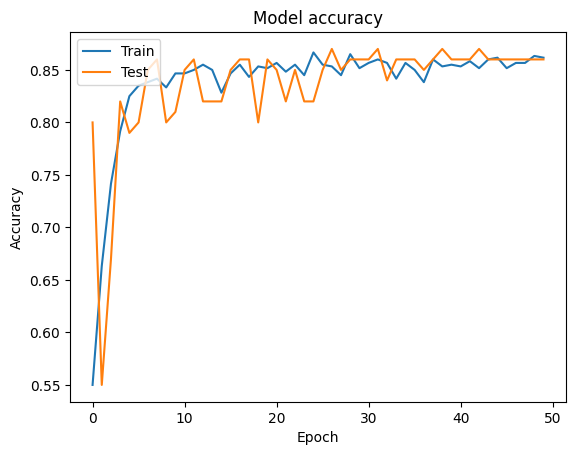

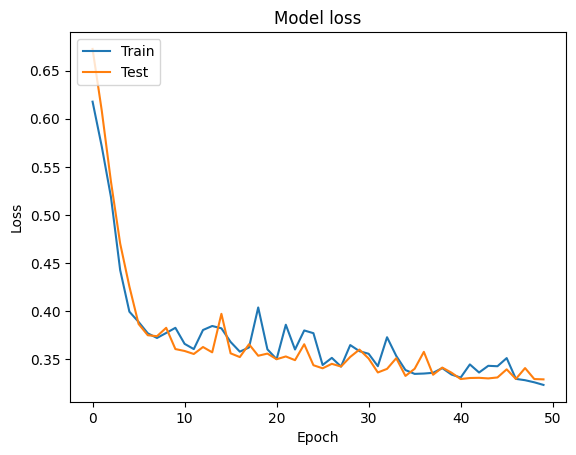

Epoch 1/50
19/19 [==============================] - 1s 16ms/step - loss: 0.6787 - accuracy: 0.5967 - val_loss: 0.6554 - val_accuracy: 0.5300
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.6350 - val_loss: 0.6510 - val_accuracy: 0.6200
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.6850 - val_loss: 0.5572 - val_accuracy: 0.6900
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7983 - val_loss: 0.4863 - val_accuracy: 0.7300
Epoch 5/50
19/19 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8183 - val_loss: 0.4627 - val_accuracy: 0.7600
Epoch 6/50
19/19 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8167 - val_loss: 0.4603 - val_accuracy: 0.7700
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8350 - val_loss: 0.4508 - val_accuracy: 0.7900
Epoch 8/50
19/19 [=

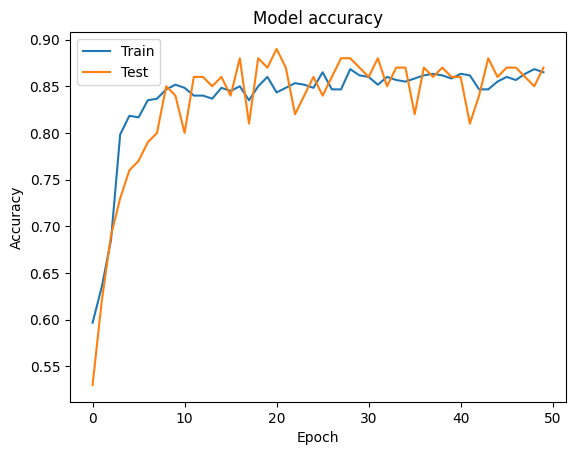

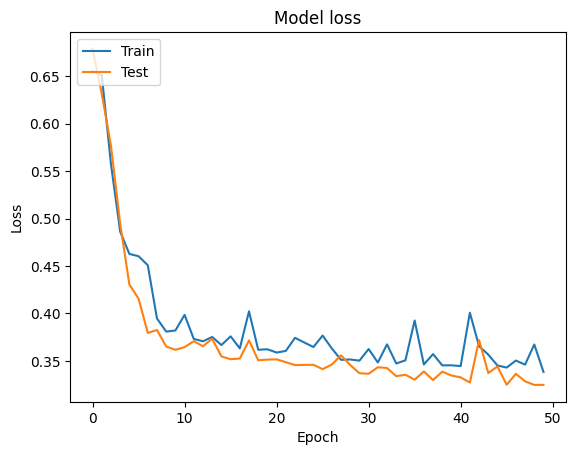

Epoch 1/50
19/19 [==============================] - 1s 9ms/step - loss: 0.6984 - accuracy: 0.5133 - val_loss: 0.6794 - val_accuracy: 0.7100
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6500 - val_loss: 0.6618 - val_accuracy: 0.7200
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6400 - val_loss: 0.6310 - val_accuracy: 0.6400
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.6817 - val_loss: 0.5973 - val_accuracy: 0.7200
Epoch 5/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.6950 - val_loss: 0.6105 - val_accuracy: 0.7100
Epoch 6/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.6800 - val_loss: 0.5861 - val_accuracy: 0.7300
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.6850 - val_loss: 0.5767 - val_accuracy: 0.7400
Epoch 8/50
19/19 [==

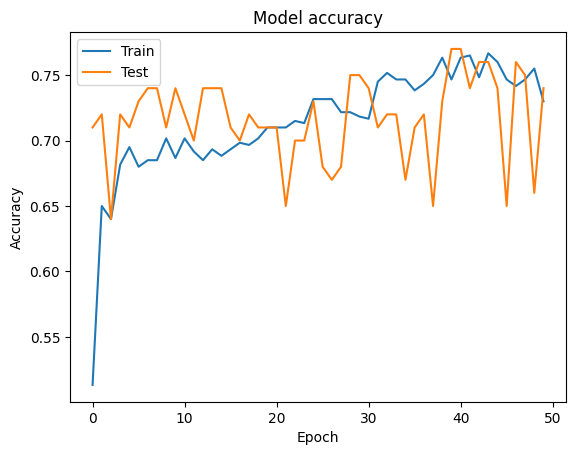

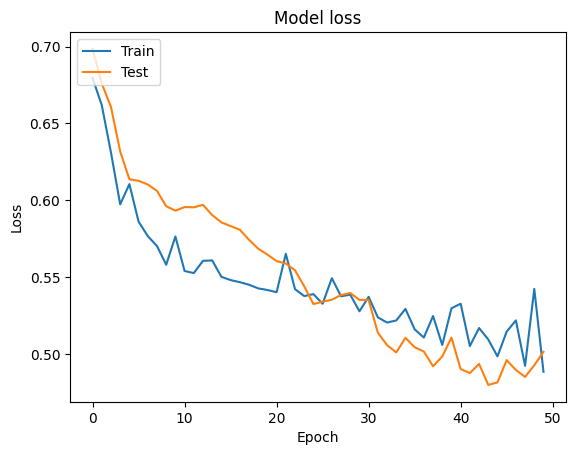

Epoch 1/50
19/19 [==============================] - 1s 10ms/step - loss: 0.6977 - accuracy: 0.5167 - val_loss: 0.7335 - val_accuracy: 0.4700
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5217 - val_loss: 0.6776 - val_accuracy: 0.5800
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5300 - val_loss: 0.6748 - val_accuracy: 0.6100
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5717 - val_loss: 0.6724 - val_accuracy: 0.6400
Epoch 5/50
19/19 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5367 - val_loss: 0.6732 - val_accuracy: 0.6500
Epoch 6/50
19/19 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5483 - val_loss: 0.6667 - val_accuracy: 0.5600
Epoch 7/50
19/19 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.5650 - val_loss: 0.7063 - val_accuracy: 0.5100
Epoch 8/50
19/19 [=

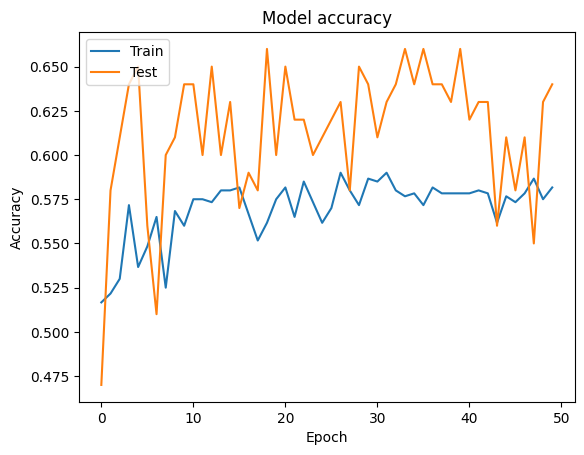

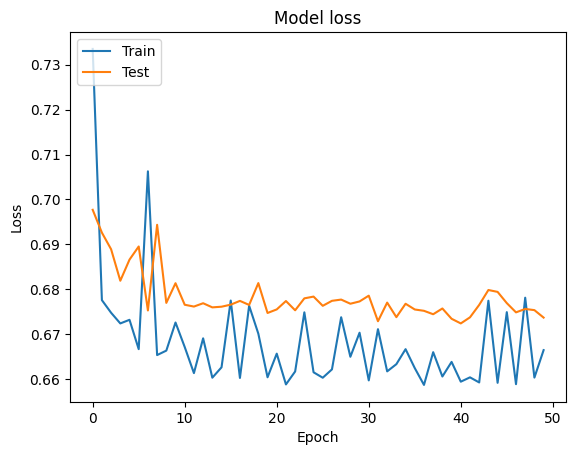

In [3]:
accur_arr, f1_arr, history_arr, q = {}, {}, {}, []
n_epoch = 50
for i in range(2,12,2):
    dataset_path = 'LSB_'+str(i)+'0.csv'
    a, f1, key_ , hist_n= model_train(dataset_path, n_epoch, i)
    accur_arr[key_] = a
    f1_arr[key_] = f1
    history_arr[key_] = hist_n
    q.append(i)

In [4]:
accur_arr, f1_arr, history_arr, q

({'LSB_20.csv': 0.7433333333333333,
  'LSB_40.csv': 0.87,
  'LSB_60.csv': 0.8633333333333333,
  'LSB_80.csv': 0.76,
  'LSB_100.csv': 0.5866666666666667},
 {'LSB_20.csv': 0.7353951890034366,
  'LSB_40.csv': 0.8729641693811075,
  'LSB_60.csv': 0.8673139158576052,
  'LSB_80.csv': 0.783132530120482,
  'LSB_100.csv': 0.6555555555555556},
 {'LSB_20.csv': <keras.callbacks.History at 0x21709594af0>,
  'LSB_40.csv': <keras.callbacks.History at 0x2170d42e980>,
  'LSB_60.csv': <keras.callbacks.History at 0x2170e656980>,
  'LSB_80.csv': <keras.callbacks.History at 0x2170e7662f0>,
  'LSB_100.csv': <keras.callbacks.History at 0x2170f6ff070>},
 [2, 4, 6, 8, 10])

In [5]:
acc_graph = []
for i in range(2,12,2):
    name = 'LSB_'+str(i)+'0.csv'
    acc_graph.append(accur_arr[name])

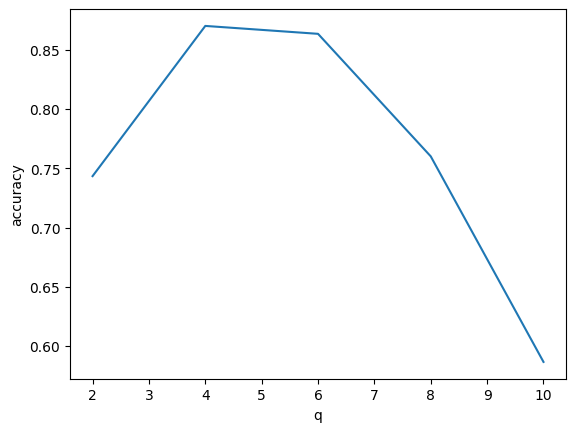

In [6]:
plt.plot(q,acc_graph)

plt.ylabel('accuracy')
plt.xlabel('q')

plt.show()